# Exploratory Data Analysis using SQL.

In [45]:
# Visualization libraries
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
#load sql library
%load_ext sql

#configure sql cell function to return pandas DataFrame.
%config SqlMagic.autopandas = True

#Connect to mysql server
%sql mysql+pymysql://root@localhost/


In [4]:
%%sql
Drop database hospital;

Create Database hospital;

USE hospital;

-- Create table to load our data into
Create table hospital_er (
date datetime,
patient_id VARCHAR(255),
patient_gender VARCHAR(255),
patient_age INT,
patient_sat_score INT,
patient_first_inital VARCHAR(255),
patient_last_name VARCHAR(255),
patient_race VARCHAR(255),
patient_admin_flag BOOLEAN,
patient_waittime INT,
department_referral VARCHAR(255)
);

 * mysql+pymysql://root@localhost/
1 rows affected.
1 rows affected.
0 rows affected.
0 rows affected.


""


In [5]:
%%sql
USE hospital;

-- load data into our table from a csv file.

LOAD DATA INFILE 'E:\\Datasets\\Hospital ER.csv'
INTO TABLE hospital_er
FIELDS TERMINATED BY ','
LINES TERMINATED BY '\n'
IGNORE 1 LINES
(
date,
patient_id,
patient_gender,
patient_age,
patient_sat_score,
patient_first_inital,
patient_last_name,
patient_race,
@var1,
patient_waittime,
department_referral
)
SET patient_admin_flag = @var1='TRUE';

 * mysql+pymysql://root@localhost/
0 rows affected.
9216 rows affected.


""


In [6]:
%%sql 
Select *
FROM hospital_er
LIMIT 5

 * mysql+pymysql://root@localhost/
5 rows affected.


,date,patient_id,patient_gender,patient_age,patient_sat_score,patient_first_inital,patient_last_name,patient_race,patient_admin_flag,patient_waittime,department_referral
0,2020-03-20 08:47:00,145-39-5406,M,69,10,H,Glasspool,White,0,39,None\r
1,2020-06-15 11:29:00,316-34-3057,M,4,0,X,Methuen,Native American/Alaska Native,1,27,None\r
2,2020-06-20 09:13:00,897-46-3852,F,56,9,P,Schubuser,African American,1,55,General Practice\r
3,2020-02-04 22:34:00,358-31-9711,F,24,8,U,Titcombe,Native American/Alaska Native,1,31,General Practice\r
4,2020-09-04 17:48:00,289-26-0537,M,5,0,Y,Gionettitti,African American,0,10,Orthopedics\r


### Check Number of Columns

In [7]:
%%sql
USE information_schema;
SELECT count(*) AS column_number
FROM columns
Where table_name='hospital_er';

 * mysql+pymysql://root@localhost/
0 rows affected.
1 rows affected.


,column_number
0,11


### Check Number of rows

In [8]:
%%sql
USE hospital;
Select Count(*) AS row_number
FROM hospital_er

 * mysql+pymysql://root@localhost/
0 rows affected.
1 rows affected.


,row_number
0,9216


## Check for Duplicates

In [9]:
%%sql 
Select count(date) AS duplicates
from hospital_er
group by date, patient_id
having count(date) > 1

 * mysql+pymysql://root@localhost/
0 rows affected.


""


## Patient count by gender

 * mysql+pymysql://root@localhost/
3 rows affected.


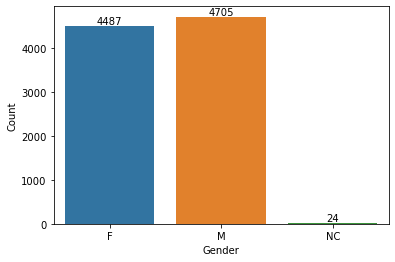

In [34]:
df = %sql Select patient_gender AS Gender, count(patient_gender) AS Count, \
(count(patient_gender) / (Select count(*) from hospital_er) * 100) AS '%' \
from hospital_er \
Group by patient_gender

ax = sns.barplot(data=df, x='Gender',y='Count')

for i in ax.containers:
    ax.bar_label(i,)

## Patient count by Race

 * mysql+pymysql://root@localhost/
7 rows affected.


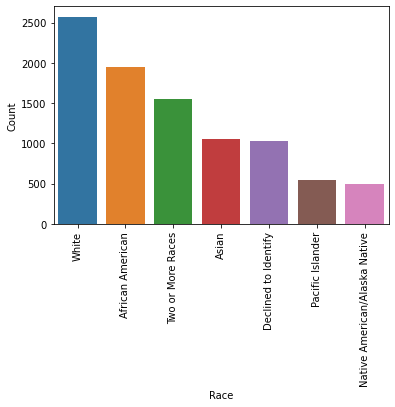

In [44]:
df = %sql Select patient_race as Race, \
count(patient_race) AS Count, \
(count(patient_race) / (Select count(*) from hospital_er) * 100) AS '%' \
from hospital_er \
Group by patient_race \
order by 2 desc

ax = sns.barplot(data=df, x='Race',y='Count')
plt.xticks(rotation=90);

### Referrals by Department.

 * mysql+pymysql://root@localhost/
8 rows affected.


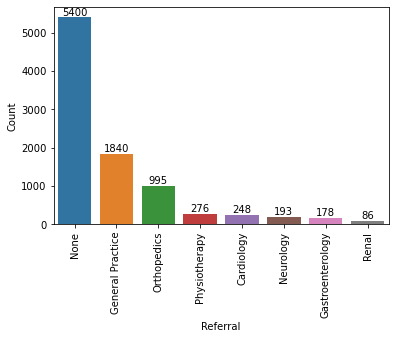

In [46]:
df = %sql Select Replace(department_referral,'\r', '') as Referral, \
count(department_referral) AS Count, \
(count(department_referral) / (Select count(*) from hospital_er) * 100) AS '%' \
from hospital_er \
Group by department_referral \
order by 2 desc

ax = sns.barplot(data=df, x='Referral',y='Count')

for i in ax.containers:
    ax.bar_label(i,)
    
plt.xticks(rotation=90);

## Patient Waiting Time

In [13]:
%%sql
select max(patient_waittime) MaximumWaitTime, 
min(patient_waittime) MinimumWaitTime, 
avg(patient_waittime) AverageWaitTime
from hospital_er

 * mysql+pymysql://root@localhost/
1 rows affected.


,MaximumWaitTime,MinimumWaitTime,AverageWaitTime
0,60,10,35.2599


## Visit Count Distrubution by Month

 * mysql+pymysql://root@localhost/
12 rows affected.


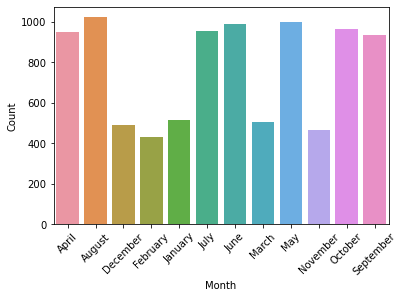

In [42]:
df = %sql select monthname(date) as Month, \
count(patient_id) AS Count \
from hospital_er \
group by monthname(date) \
order by 1, 2 desc

ax = sns.barplot(data=df, x='Month',y='Count')
plt.xticks(rotation=45);

## Visit Count Distrubution by Day

 * mysql+pymysql://root@localhost/
7 rows affected.


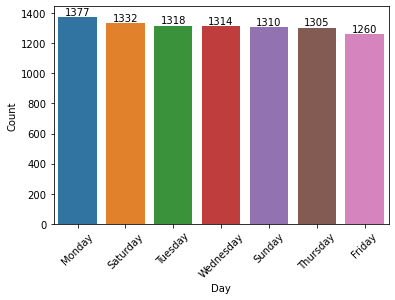

In [37]:
df = %sql select dayname(date) as Day, \
Count(patient_id) AS Count \
from hospital_er \
group by dayname(date) \
order by 2 desc;

ax = sns.barplot(data=df, x='Day',y='Count')
for i in ax.containers:
    ax.bar_label(i,)
plt.xticks(rotation=45);

## Visit Count Distrubution by Hour of the Day

 * mysql+pymysql://root@localhost/
24 rows affected.


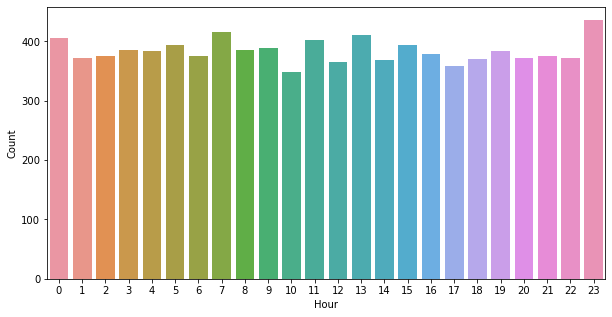

In [43]:
df = %sql select hour(date) as Hour, \
Count(patient_id) AS Count \
from hospital_er \
group by hour(date) \
order by 2 desc\

figure = plt.figure(figsize=(10, 5))
ax = sns.barplot(data=df, x='Hour', y='Count')


## Age Distribution

 * mysql+pymysql://root@localhost/
9216 rows affected.


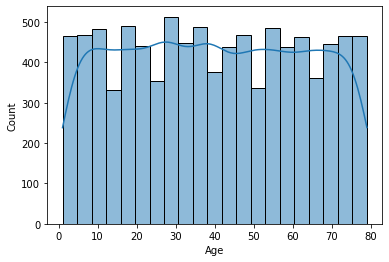

In [17]:
df = %sql select patient_age as Age \
from hospital_er

sns.histplot(df['Age'], kde=True);

In [18]:
%%sql
select max(patient_age) MaximumAge, 
min(patient_age) MinimumAge, 
Round(avg(patient_age), 0) AverageAge
from hospital_er

 * mysql+pymysql://root@localhost/
1 rows affected.


,MaximumAge,MinimumAge,AverageAge
0,79,1,40
